# Explore here

import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import kagglehub 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import pymysql

import requests
import sklearn 
import seaborn as sns 
import sqlalchemy
import sympy
import xgboost


In [22]:
path = kagglehub.dataset_download("samayashar/fraud-detection-transactions-dataset")
print("Path to dataset files:", path)

Path to dataset files: /home/vscode/.cache/kagglehub/datasets/samayashar/fraud-detection-transactions-dataset/versions/1


In [23]:
df = pd.read_csv(f'{path}/synthetic_fraud_dataset.csv')
df.head()

Transaction_ID    User_ID  Transaction_Amount Transaction_Type  \
0      TXN_33553  USER_1834               39.79              POS   
1       TXN_9427  USER_7875                1.19    Bank Transfer   
2        TXN_199  USER_2734               28.96           Online   
3      TXN_12447  USER_2617              254.32   ATM Withdrawal   
4      TXN_39489  USER_2014               31.28              POS   

             Timestamp  Account_Balance Device_Type  Location  \
0  2023-08-14 19:30:00         93213.17      Laptop    Sydney   
1  2023-06-07 04:01:00         75725.25      Mobile  New York   
2  2023-06-20 15:25:00          1588.96      Tablet    Mumbai   
3  2023-12-07 00:31:00         76807.20      Tablet  New York   
4  2023-11-11 23:44:00         92354.66      Mobile    Mumbai   

  Merchant_Category  IP_Address_Flag  ...  Daily_Transaction_Count  \
0            Travel                0  ...                        7   
1          Clothing                0  ...                       13   
2       Restaurants                0  ...                       14   
3          Clothing                0  ...                        8   
4       Electronics                0  ...                       14   

   Avg_Transaction_Amount_7d  Failed_Transaction_Count_7d   Card_Type  \
0                     437.63                            3        Amex   
1                     478.76                            4  Mastercard   
2                      50.01                            4        Visa   
3                     182.48                            4        Visa   
4                     328.69                            4  Mastercard   

  Card_Age  Transaction_Distance  Authentication_Method Risk_Score  \
0       65                883.17              Biometric     0.8494   
1      186               2203.36               Password     0.0959   
2      226               1909.29              Biometric     0.8400   
3       76               1311.86                    OTP     0.7935   
4      140                966.98               Password     0.3819   

   Is_Weekend  Fraud_Label  
0           0            0  
1           0            1  
2           0            1  
3           0            1  
4           1            1  

[5 rows x 21 columns]

In [24]:
df.shape

(50000, 21)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

<Axes: xlabel='Transaction_Amount', ylabel='Card_Type'>

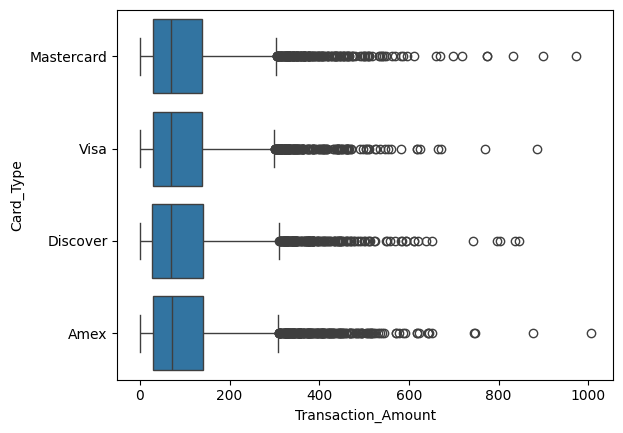

In [26]:
sns.boxplot(x=df.query("Fraud_Label==1").Transaction_Amount,y=df.query("Fraud_Label==1").Card_Type)

Eliminamos Informacion irrelevante

In [27]:
df.drop_duplicates

df.shape

(50000, 21)

1:comportamiento de transacciones 
2:cuentas mayores con movimientos atipicos 
3:horarios de transacciones con cargos altos
4:metodos de autenticacion

In [28]:
df.drop(['IP_Address_Flag'],axis = 1, inplace = True)
df.head()


Transaction_ID    User_ID  Transaction_Amount Transaction_Type  \
0      TXN_33553  USER_1834               39.79              POS   
1       TXN_9427  USER_7875                1.19    Bank Transfer   
2        TXN_199  USER_2734               28.96           Online   
3      TXN_12447  USER_2617              254.32   ATM Withdrawal   
4      TXN_39489  USER_2014               31.28              POS   

             Timestamp  Account_Balance Device_Type  Location  \
0  2023-08-14 19:30:00         93213.17      Laptop    Sydney   
1  2023-06-07 04:01:00         75725.25      Mobile  New York   
2  2023-06-20 15:25:00          1588.96      Tablet    Mumbai   
3  2023-12-07 00:31:00         76807.20      Tablet  New York   
4  2023-11-11 23:44:00         92354.66      Mobile    Mumbai   

  Merchant_Category  Previous_Fraudulent_Activity  Daily_Transaction_Count  \
0            Travel                             0                        7   
1          Clothing                             0                       13   
2       Restaurants                             0                       14   
3          Clothing                             0                        8   
4       Electronics                             1                       14   

   Avg_Transaction_Amount_7d  Failed_Transaction_Count_7d   Card_Type  \
0                     437.63                            3        Amex   
1                     478.76                            4  Mastercard   
2                      50.01                            4        Visa   
3                     182.48                            4        Visa   
4                     328.69                            4  Mastercard   

   Card_Age  Transaction_Distance Authentication_Method  Risk_Score  \
0        65                883.17             Biometric      0.8494   
1       186               2203.36              Password      0.0959   
2       226               1909.29             Biometric      0.8400   
3        76               1311.86                   OTP      0.7935   
4       140                966.98              Password      0.3819   

   Is_Weekend  Fraud_Label  
0           0            0  
1           0            1  
2           0            1  
3           0            1  
4           1            1

Guardamos la informacion

In [29]:

df.to_csv("../data/raw/df.csv", index = False)

Guardamos la Base de Datos en SQL

In [ ]:
from sqlalchemy import create_engine

In [30]:
import sqlite3
import pandas as pd

# Conexión a SQLite y creación de la tabla
conn = sqlite3.connect('synthetic_fraud_dataset.db')
cursor = conn.cursor()
cursor.execute('''
CREATE TABLE IF NOT EXISTS synthetic_fraud_data (
    Transaction_ID TEXT,
    User_ID TEXT,
    Transaction_Amount REAL,
    Transaction_Type TEXT,
    Timestamp TEXT,
    Account_Balance REAL,
    Device_Type TEXT,
    Location TEXT,
    Merchant_Category TEXT,
    IP_Address_Flag INTEGER,
    Previous_Fraudulent_Activity INTEGER,
    Daily_Transaction_Count INTEGER,
    Avg_Transaction_Amount_7d REAL,
    Failed_Transaction_Count_7d INTEGER,
    Card_Type TEXT,
    Card_Age INTEGER,
    Transaction_Distance REAL,
    Authentication_Method TEXT,
    Risk_Score REAL,
    Is_Weekend INTEGER,
    Fraud_Label INTEGER
)
''')

# Leer el CSV y guardar en SQLite
df = pd.read_csv(f'{path}/synthetic_fraud_dataset.csv')
df.to_sql('synthetic_fraud_data', conn, if_exists='replace', index=False)

# Verificar la inserción en formato tabla
query = 'SELECT * FROM synthetic_fraud_data LIMIT 10'  # Solo algunas filas para no saturar
df_verificacion = pd.read_sql(query, conn)
print("\nPrimeras filas de la tabla:")
print(df_verificacion)

# Consulta: obtener filas con fraude y mostrarlas como tabla
fraud_query = 'SELECT * FROM synthetic_fraud_data WHERE Fraud_Label = 1 LIMIT 10'
df_fraude = pd.read_sql(fraud_query, conn)
print("\nTransacciones fraudulentas:")
print(df_fraude)

# Consulta: contar el número de filas
count_query = 'SELECT COUNT(*) AS total_filas FROM synthetic_fraud_data'
df_count = pd.read_sql(count_query, conn)
print("\nNúmero total de filas:")
print(df_count)

# Cerrar la conexión
conn.close()



Primeras filas de la tabla:
  Transaction_ID    User_ID  Transaction_Amount Transaction_Type  \
0      TXN_33553  USER_1834               39.79              POS   
1       TXN_9427  USER_7875                1.19    Bank Transfer   
2        TXN_199  USER_2734               28.96           Online   
3      TXN_12447  USER_2617              254.32   ATM Withdrawal   
4      TXN_39489  USER_2014               31.28              POS   
5      TXN_42724  USER_6852              168.55           Online   
6      TXN_10822  USER_5052                3.79              POS   
7      TXN_49498  USER_4660                7.08   ATM Withdrawal   
8       TXN_4144  USER_1584               34.25   ATM Withdrawal   
9      TXN_36958  USER_9498               16.24              POS   

             Timestamp  Account_Balance Device_Type  Location  \
0  2023-08-14 19:30:00         93213.17      Laptop    Sydney   
1  2023-06-07 04:01:00         75725.25      Mobile  New York   
2  2023-06-20 15:25:00     

<Axes: xlabel='Transaction_Amount', ylabel='Card_Type'>

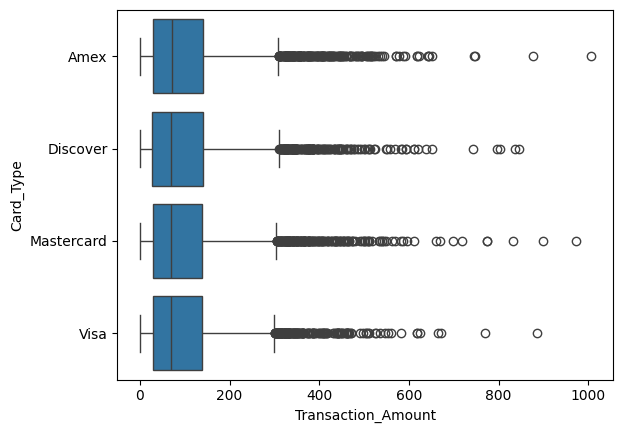

In [33]:
sns.boxplot(x=df.query("Fraud_Label==1").Transaction_Amount,y=df.query("Fraud_Label==1").Card_Type)

<Axes: xlabel='Transaction_Amount', ylabel='Card_Type'>

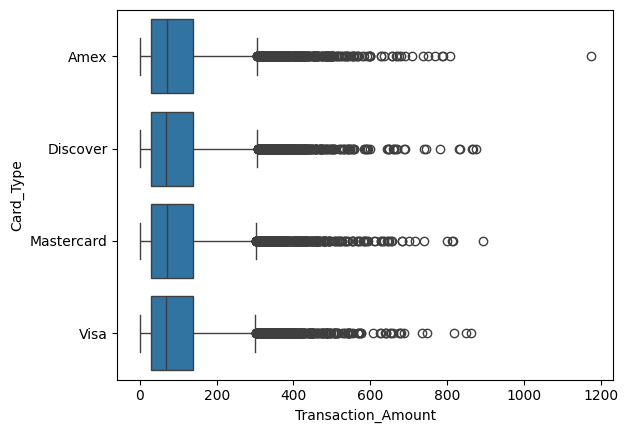

In [34]:
sns.boxplot(x=df.query("Fraud_Label==0").Transaction_Amount,y=df.query("Fraud_Label==0").Card_Type)

In [35]:
df.groupby(["Authentication_Method","Fraud_Label"]).size().reset_index()
df2 = df.groupby(["Authentication_Method","Fraud_Label"]).size().reset_index()
df2 = df2.rename(columns={0: "valor"})
print (df2)

  Authentication_Method  Fraud_Label  valor
0             Biometric            0   8553
1             Biometric            1   4038
2                   OTP            0   8345
3                   OTP            1   4021
4                   PIN            0   8608
5                   PIN            1   3978
6              Password            0   8427
7              Password            1   4030


/tmp/ipykernel_2492/1070938346.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Authentication_Method","Fraud_Label"]).size().reset_index()
/tmp/ipykernel_2492/1070938346.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = df.groupby(["Authentication_Method","Fraud_Label"]).size().reset_index()


<Axes: xlabel='Authentication_Method', ylabel='Count'>

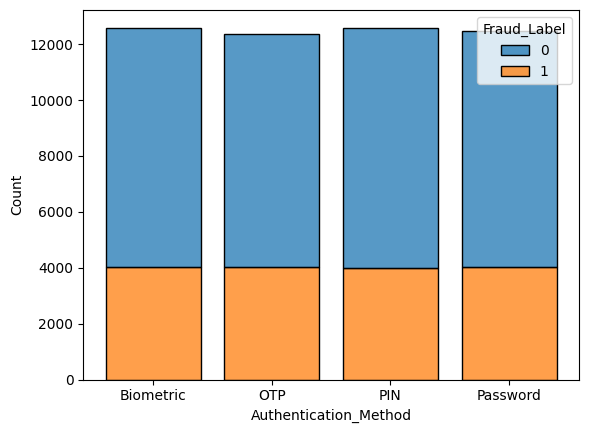

In [36]:
sns.histplot(df2, x="Authentication_Method", weights="valor", hue="Fraud_Label", multiple="stack", shrink=0.8)

Convertimos las variables categoricasa dtype

In [31]:
var_categoricas = ['Transaction_Type', 'Device_Type', 'Location', 'Merchant_Category', 'Card_Type', 'Authentication_Method']
df[var_categoricas] = df[var_categoricas].astype('category')

Convertimos las variables binarias a integrales

In [32]:
var_bin = ['Previous_Fraudulent_Activity', 'Is_Weekend', 'Fraud_Label']
df[var_bin] = df[var_bin].astype(int)

Estandarizamos las variables numericas

In [ ]:
from sklearn.preprocessing import StandardScaler
var_num = ['Transaction_Amount', 'Account_Balance', 'Daily_Transaction_Count', 
                'Avg_Transaction_Amount_7d', 'Failed_Transaction_Count_7d', 
                'Card_Age', 'Transaction_Distance', 'Risk_Score']

scaler = StandardScaler()
df[var_num] = scaler.fit_transform(df[var_num])

**EDA**

Analisis de variables univariante

Analisis sobre variables categoricas

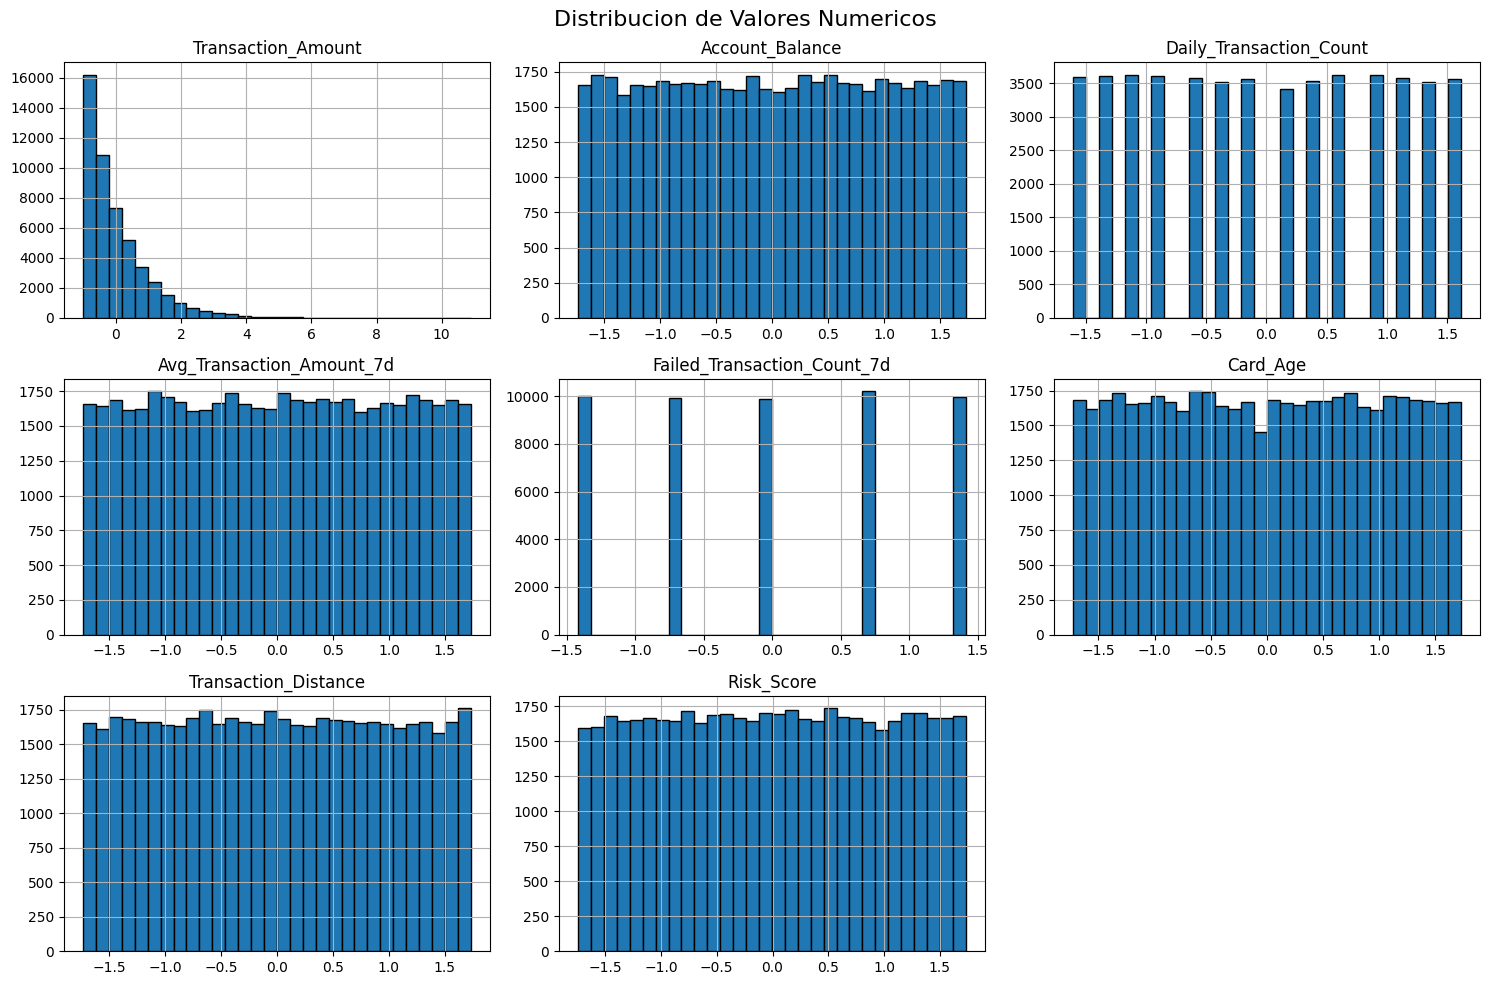

In [ ]:
df[var_num].hist(bins=30, figsize=(15, 10), layout=(3, 3), edgecolor='black')
plt.suptitle("Distribucion de Valores Numericos", fontsize=16)
plt.tight_layout()
plt.show()


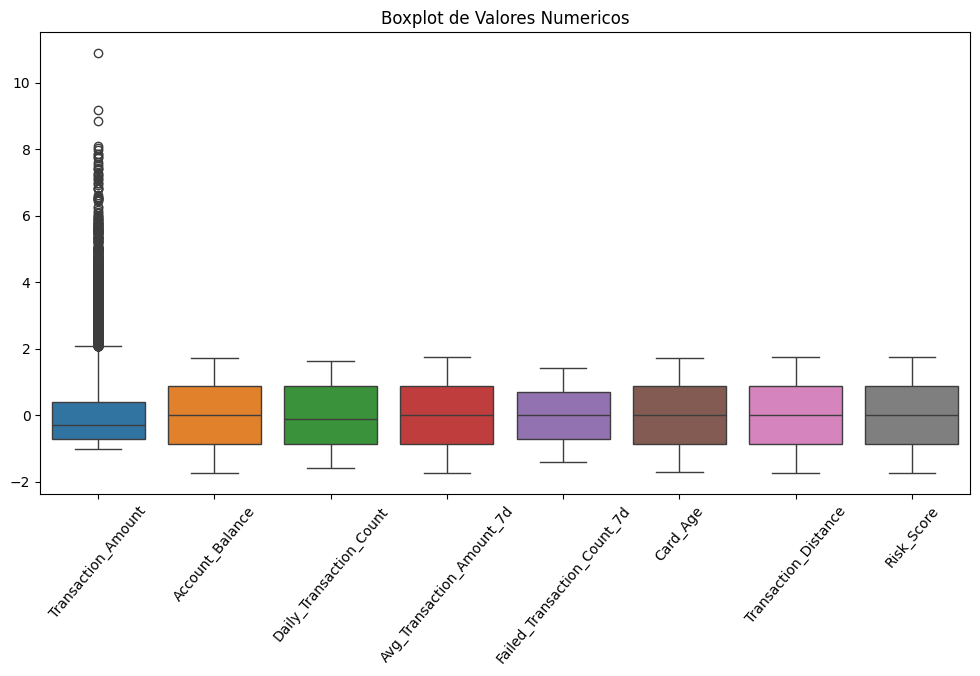

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[var_num])
plt.xticks(rotation=50)
plt.title("Boxplot de Valores Numericos")
plt.show()

Analisis sobre variables numericas en singular

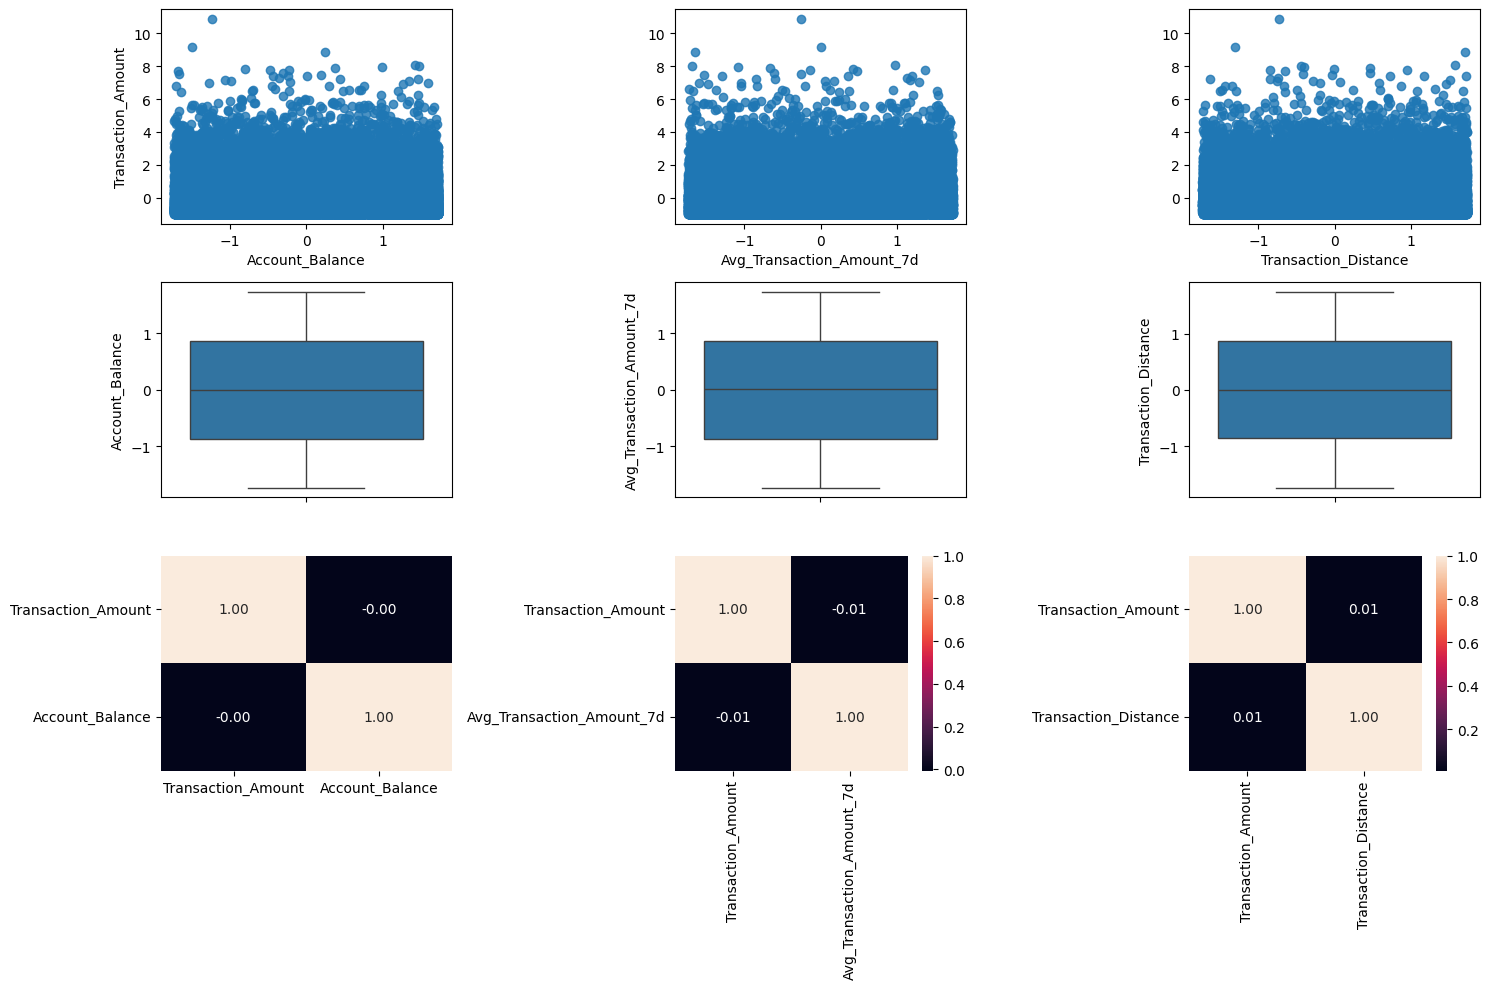

In [ ]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.regplot(ax = axis[0, 0], data = df, x = "Account_Balance", y = "Transaction_Amount")
sns.heatmap(df[["Transaction_Amount", "Account_Balance"]].corr(), annot = True, fmt = ".2f", ax = axis[2, 0], cbar = False)
sns.boxplot(ax = axis[1, 0], data = df, y = "Account_Balance")
sns.regplot(ax = axis[0, 1], data = df, x = "Avg_Transaction_Amount_7d", y = "Transaction_Amount").set(ylabel=None)
sns.heatmap(df[["Transaction_Amount", "Avg_Transaction_Amount_7d"]].corr(), annot = True, fmt = ".2f", ax = axis[2, 1])
sns.boxplot(ax = axis[1, 1], data = df, y = "Avg_Transaction_Amount_7d")
sns.regplot(ax = axis[0, 2], data = df, x = "Transaction_Distance", y = "Transaction_Amount").set(ylabel=None)
sns.heatmap(df[["Transaction_Amount", "Transaction_Distance"]].corr(), annot = True, fmt = ".2f", ax = axis[2, 2])
sns.boxplot(ax = axis[1, 2], data = df, y = "Transaction_Distance")
plt.tight_layout()
plt.show()

Analisis de variables multivariante

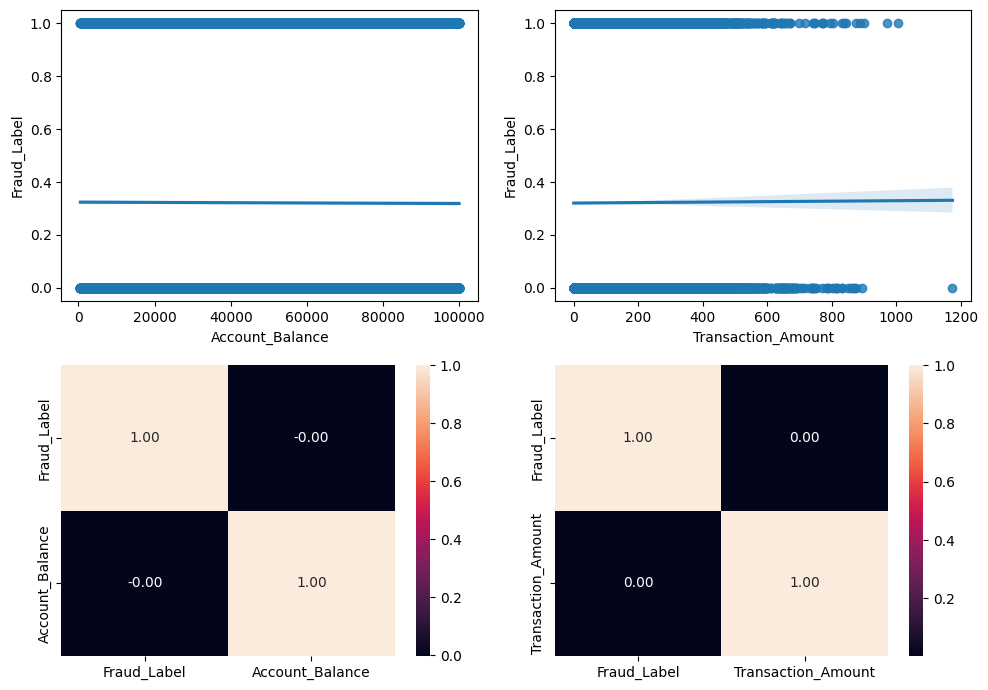

In [ ]:
#Fraud_Level - (Account_Balance, Transaction_Amount)
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0,0], data = df, x = "Account_Balance", y = "Fraud_Label")
sns.heatmap(df[["Fraud_Label", "Account_Balance"]].corr(), annot = True, fmt = ".2f", ax = axis[1,0])
sns.regplot(ax = axis[0,1], data = df, x = "Transaction_Amount", y = "Fraud_Label")
sns.heatmap(df[["Fraud_Label", "Transaction_Amount"]].corr(), annot = True, fmt = ".2f", ax = axis[1,1])
plt.tight_layout()
plt.show()

Account_Balance - Transaction_Amount

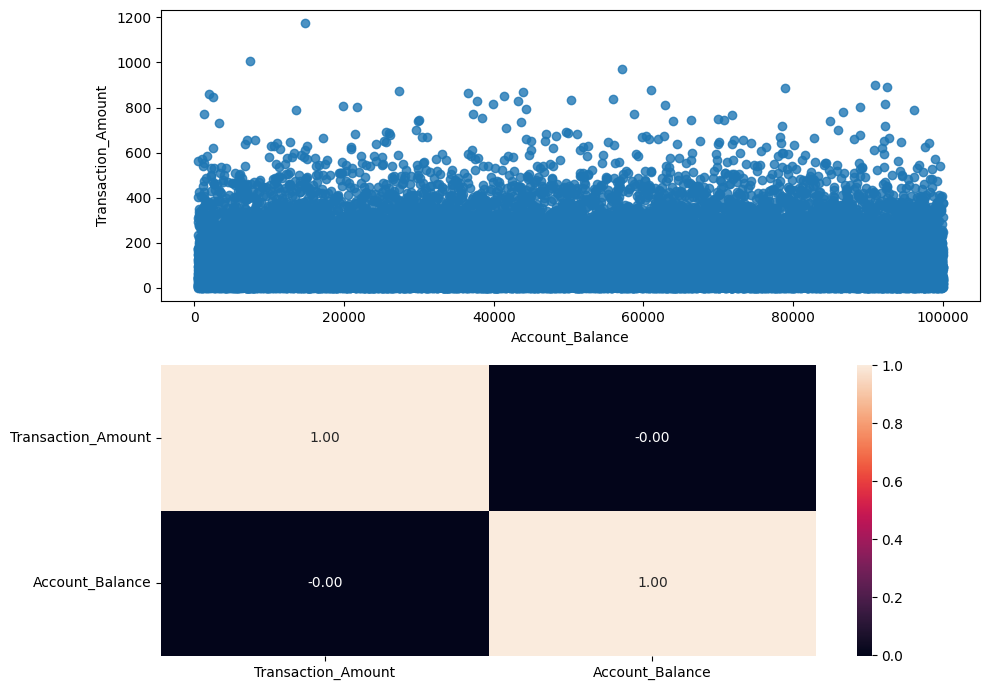

In [ ]:
fig, axis = plt.subplots(2, 1, figsize = (10, 7))

sns.regplot(ax = axis[0], data = df, x = "Account_Balance", y = "Transaction_Amount")
sns.heatmap(df[["Transaction_Amount", "Account_Balance"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

plt.tight_layout()
plt.show()


Analisis Categorico-Categorico

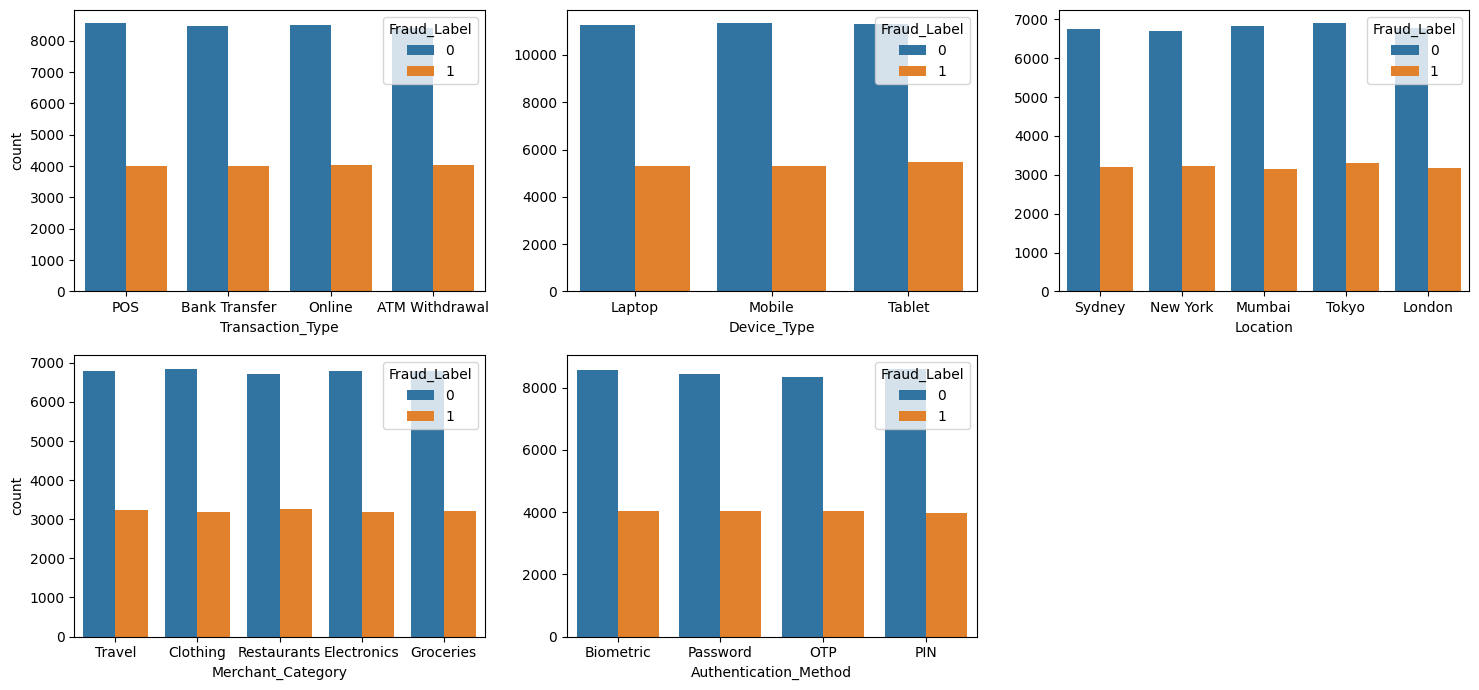

In [ ]:
fig, axis = plt.subplots(2, 3, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = df, x = "Transaction_Type", hue = "Fraud_Label")
sns.countplot(ax = axis[0, 1], data = df, x = "Device_Type", hue = "Fraud_Label").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = df, x = "Location", hue = "Fraud_Label").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = df, x = "Merchant_Category", hue = "Fraud_Label")
sns.countplot(ax = axis[1, 1], data = df, x = "Authentication_Method", hue = "Fraud_Label").set(ylabel = None)

plt.tight_layout()
fig.delaxes(axis[1, 2])

plt.show()

Combinacion de la clase con varias predictoras

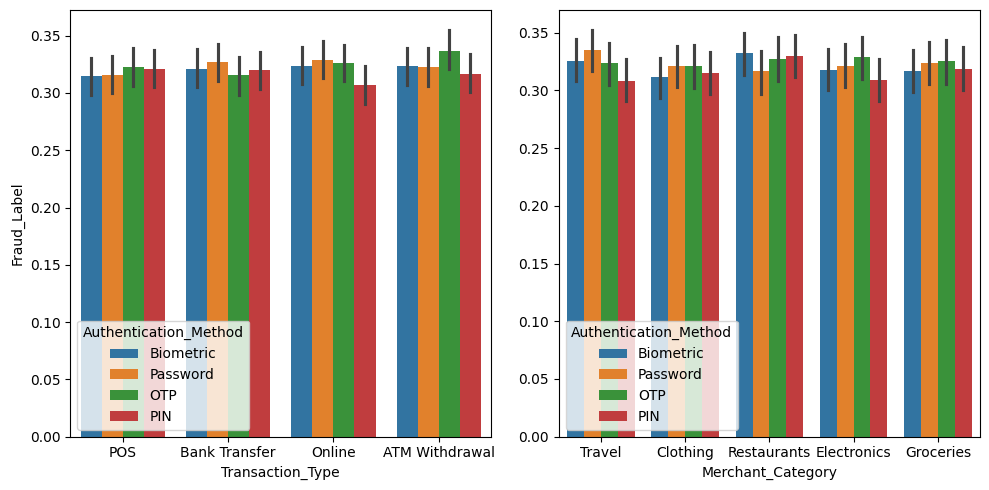

In [ ]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = df, x = "Transaction_Type", y = "Fraud_Label", hue = "Authentication_Method")
sns.barplot(ax = axis[1], data = df, x = "Merchant_Category", y = "Fraud_Label", hue = "Authentication_Method").set(ylabel = None)

plt.tight_layout()

plt.show()

Analisis de correlaciones

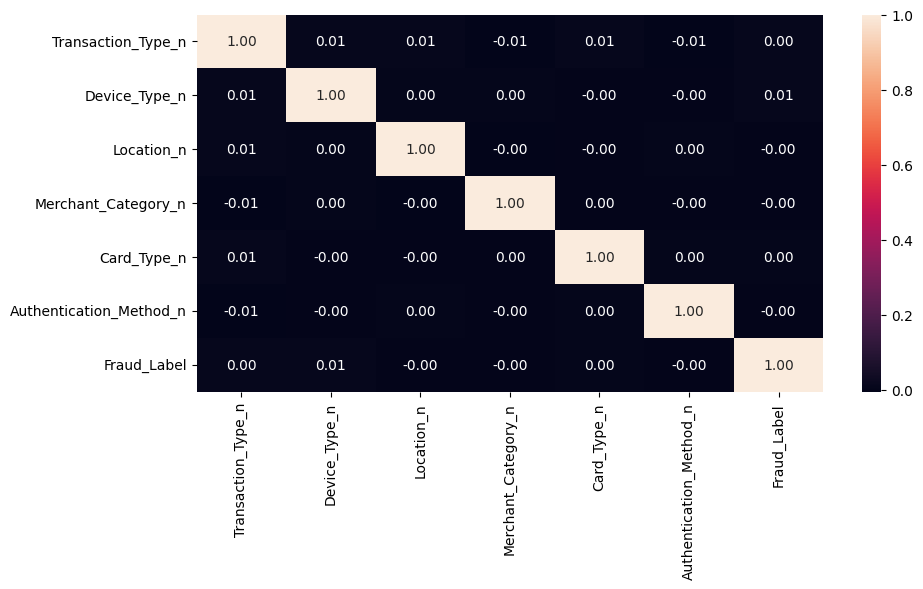

In [ ]:
df["Transaction_Type_n"] = pd.factorize(df["Transaction_Type"])[0]
df["Device_Type_n"] = pd.factorize(df["Device_Type"])[0]
df["Location_n"] = pd.factorize(df["Location"])[0]
df["Merchant_Category_n"] = pd.factorize(df["Merchant_Category"])[0]
df["Card_Type_n"] = pd.factorize(df["Card_Type"])[0]
df["Authentication_Method_n"] = pd.factorize(df["Authentication_Method"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(df[["Transaction_Type_n", "Device_Type_n", "Location_n", "Merchant_Category_n", "Card_Type_n", "Authentication_Method_n", "Fraud_Label"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Analisis numerico-categorico (completo)

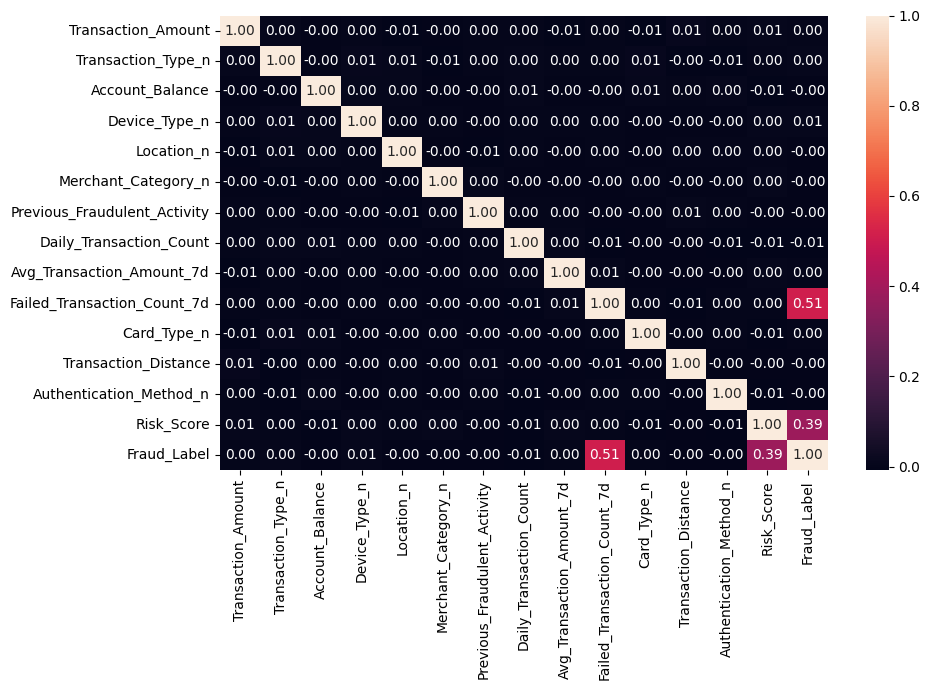

In [ ]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(df[["Transaction_Amount", "Transaction_Type_n", "Account_Balance", "Device_Type_n", "Location_n", "Merchant_Category_n", "Previous_Fraudulent_Activity", "Daily_Transaction_Count","Avg_Transaction_Amount_7d", "Failed_Transaction_Count_7d", "Card_Type_n", "Transaction_Distance", "Authentication_Method_n", "Risk_Score", "Fraud_Label"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Analisis de correlacion 

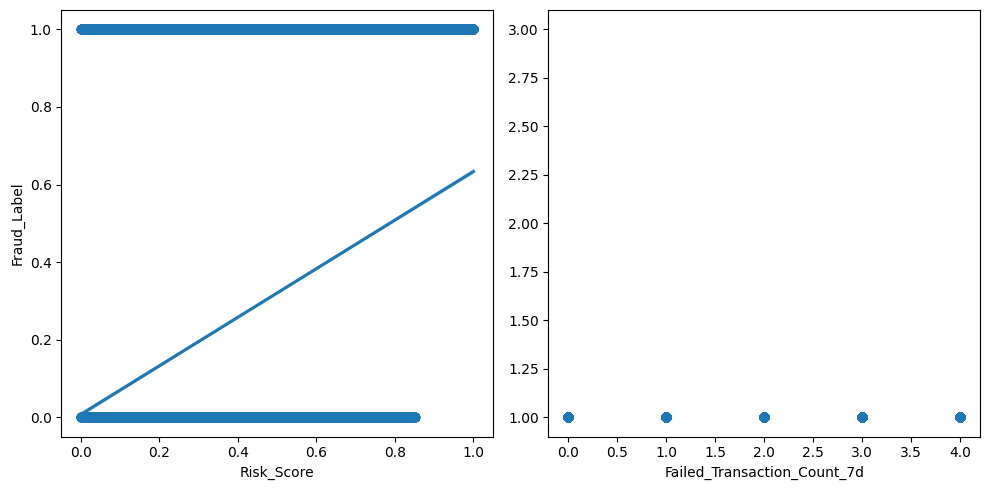

In [ ]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = df, x = "Risk_Score", y = "Fraud_Label")
sns.regplot(ax = axis[1], data = df, x = "Failed_Transaction_Count_7d", y = "Fraud_Label").set(ylabel = None, ylim = (0.9, 3.1))

plt.tight_layout()

plt.show()

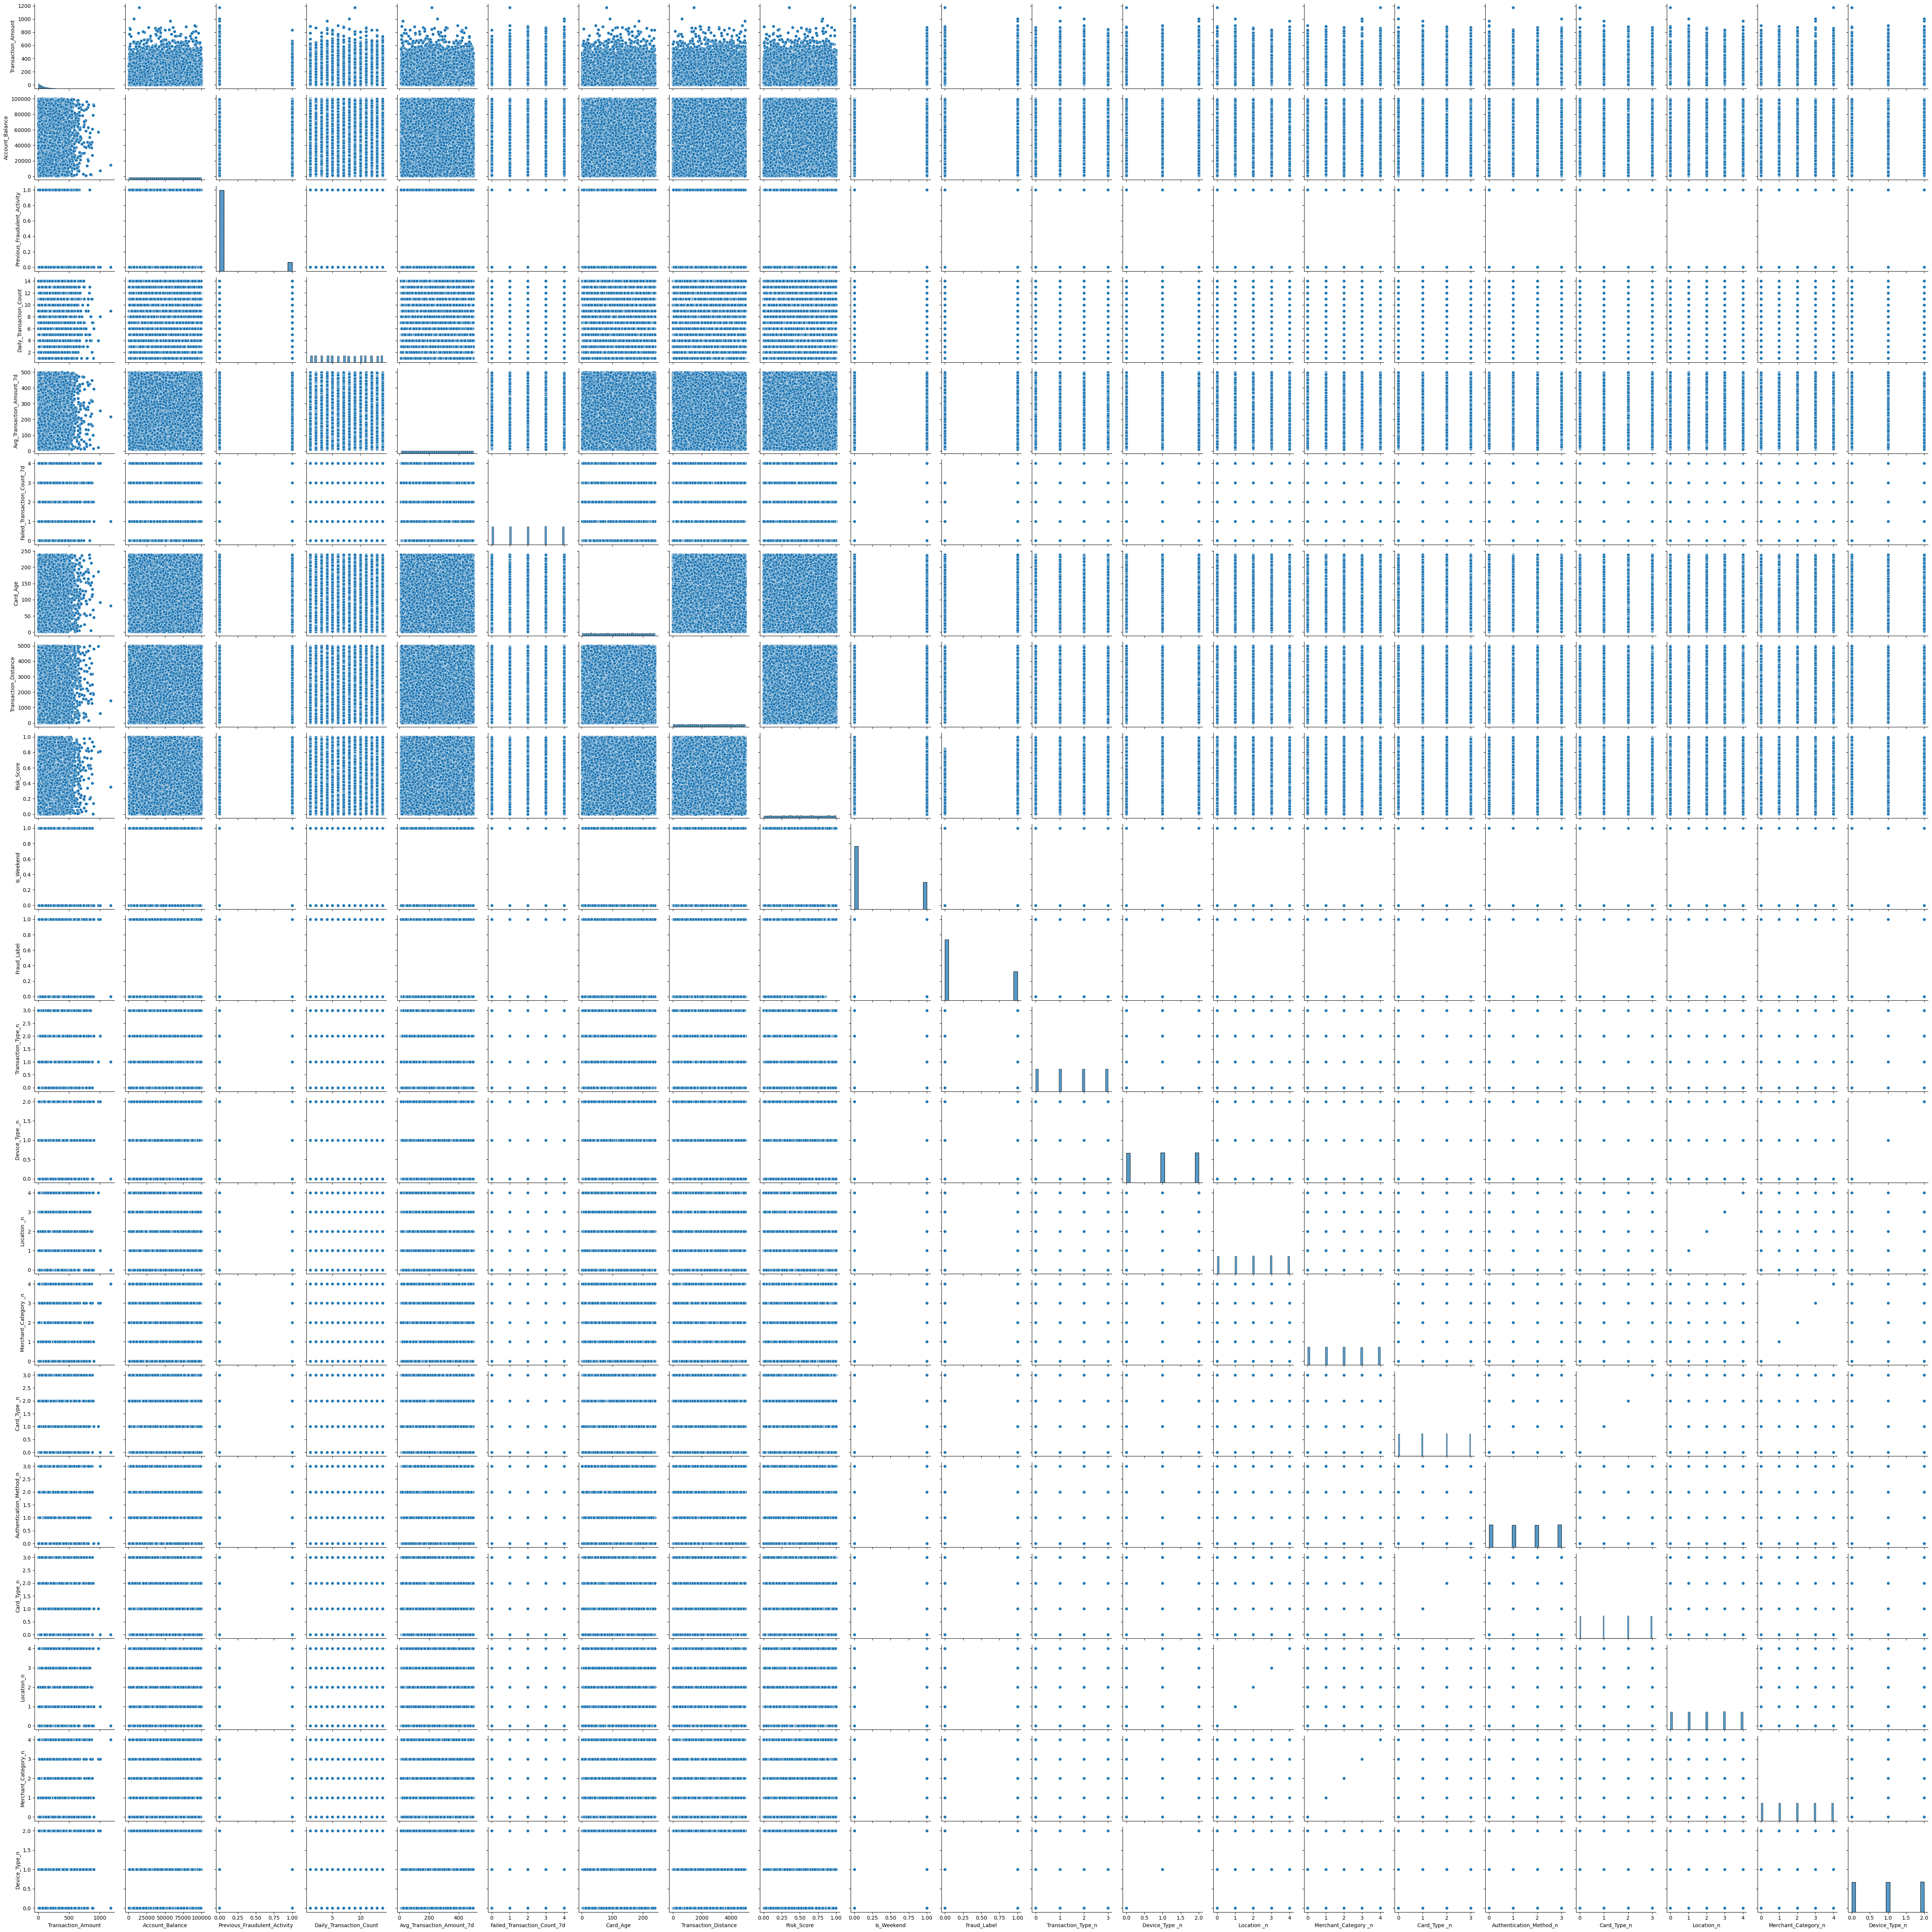

In [ ]:
sns.pairplot(data = df)